# Exploratory Data Analysis: Weather Data

This notebook analyzes weather data from multiple locations to identify patterns that might correlate with health risks.

## Objectives:
1. Load and explore weather data
2. Analyze weather patterns across cities
3. Identify correlations between weather and health indicators
4. Feature engineering for integration with health data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
# Load data
data_dir = Path().absolute().parent / "data" / "raw"
weather_file = data_dir / "weather_data.csv"

if weather_file.exists():
    df = pd.read_csv(weather_file, parse_dates=['timestamp'])
    print(f"✓ Loaded {len(df)} records")
else:
    print("Data file not found. Running data collection...")
    sys.path.append(str(Path().absolute().parent / "src"))
    from data_ingestion.collect_data import collect_all_data, load_config
    config = load_config()
    collect_all_data(config)
    df = pd.read_csv(weather_file, parse_dates=['timestamp'])
    print(f"✓ Loaded {len(df)} records")

print(f"\nDataset shape: {df.shape}")
print(f"Cities: {df['city'].unique()}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")


✓ Loaded 150 records

Dataset shape: (150, 10)
Cities: ['New York' 'London' 'Tokyo' 'Delhi' 'Beijing']
Date range: 2025-10-16 17:51:19.774889 to 2025-11-14 17:51:19.798139


In [ ]:
df.head(10)


,city,timestamp,latitude,longitude,temperature,humidity,pressure,wind_speed,visibility,weather_condition
0,New York,2025-10-16 17:51:19.774889,40.7128,-74.006,9.38,66.58,1033.60,0.17,12.34,cold
1,New York,2025-10-17 17:51:19.774889,40.7128,-74.006,2.84,76.25,1006.57,3.31,6.42,cold
2,New York,2025-10-18 17:51:19.774889,40.7128,-74.006,6.48,62.75,1022.37,0.00,12.09,cold
3,New York,2025-10-19 17:51:19.774889,40.7128,-74.006,2.47,57.81,1022.52,0.00,9.20,cold
4,New York,2025-10-20 17:51:19.774889,40.7128,-74.006,4.34,57.20,1012.23,3.60,11.29,cold
5,New York,2025-10-21 17:51:19.774889,40.7128,-74.006,5.85,80.70,1002.40,0.42,7.72,rainy
6,New York,2025-10-22 17:51:19.774889,40.7128,-74.006,4.62,67.72,1000.99,0.00,9.86,cold
7,New York,2025-10-23 17:51:19.774889,40.7128,-74.006,5.59,78.72,1008.63,0.00,7.14,cold
8,New York,2025-10-24 17:51:19.774889,40.7128,-74.006,7.28,66.55,1021.02,0.00,8.02,cold
9,New York,2025-10-25 17:51:19.774889,40.7128,-74.006,4.36,82.58,1015.08,4.56,4.05,rainy


In [ ]:
# Basic statistics
print("Dataset Info:")
print(df.info())
print("\n" + "="*60)
print("\nBasic Statistics:")
print(df.describe())
print("\n" + "="*60)
print("\nWeather Conditions:")
print(df['weather_condition'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               150 non-null    object        
 1   timestamp          150 non-null    datetime64[ns]
 2   latitude           150 non-null    float64       
 3   longitude          150 non-null    float64       
 4   temperature        150 non-null    float64       
 5   humidity           150 non-null    float64       
 6   pressure           150 non-null    float64       
 7   wind_speed         150 non-null    float64       
 8   visibility         150 non-null    float64       
 9   weather_condition  150 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 11.8+ KB
None


Basic Statistics:
                           timestamp  latitude   longitude  temperature  \
count                            150  150.0000  1

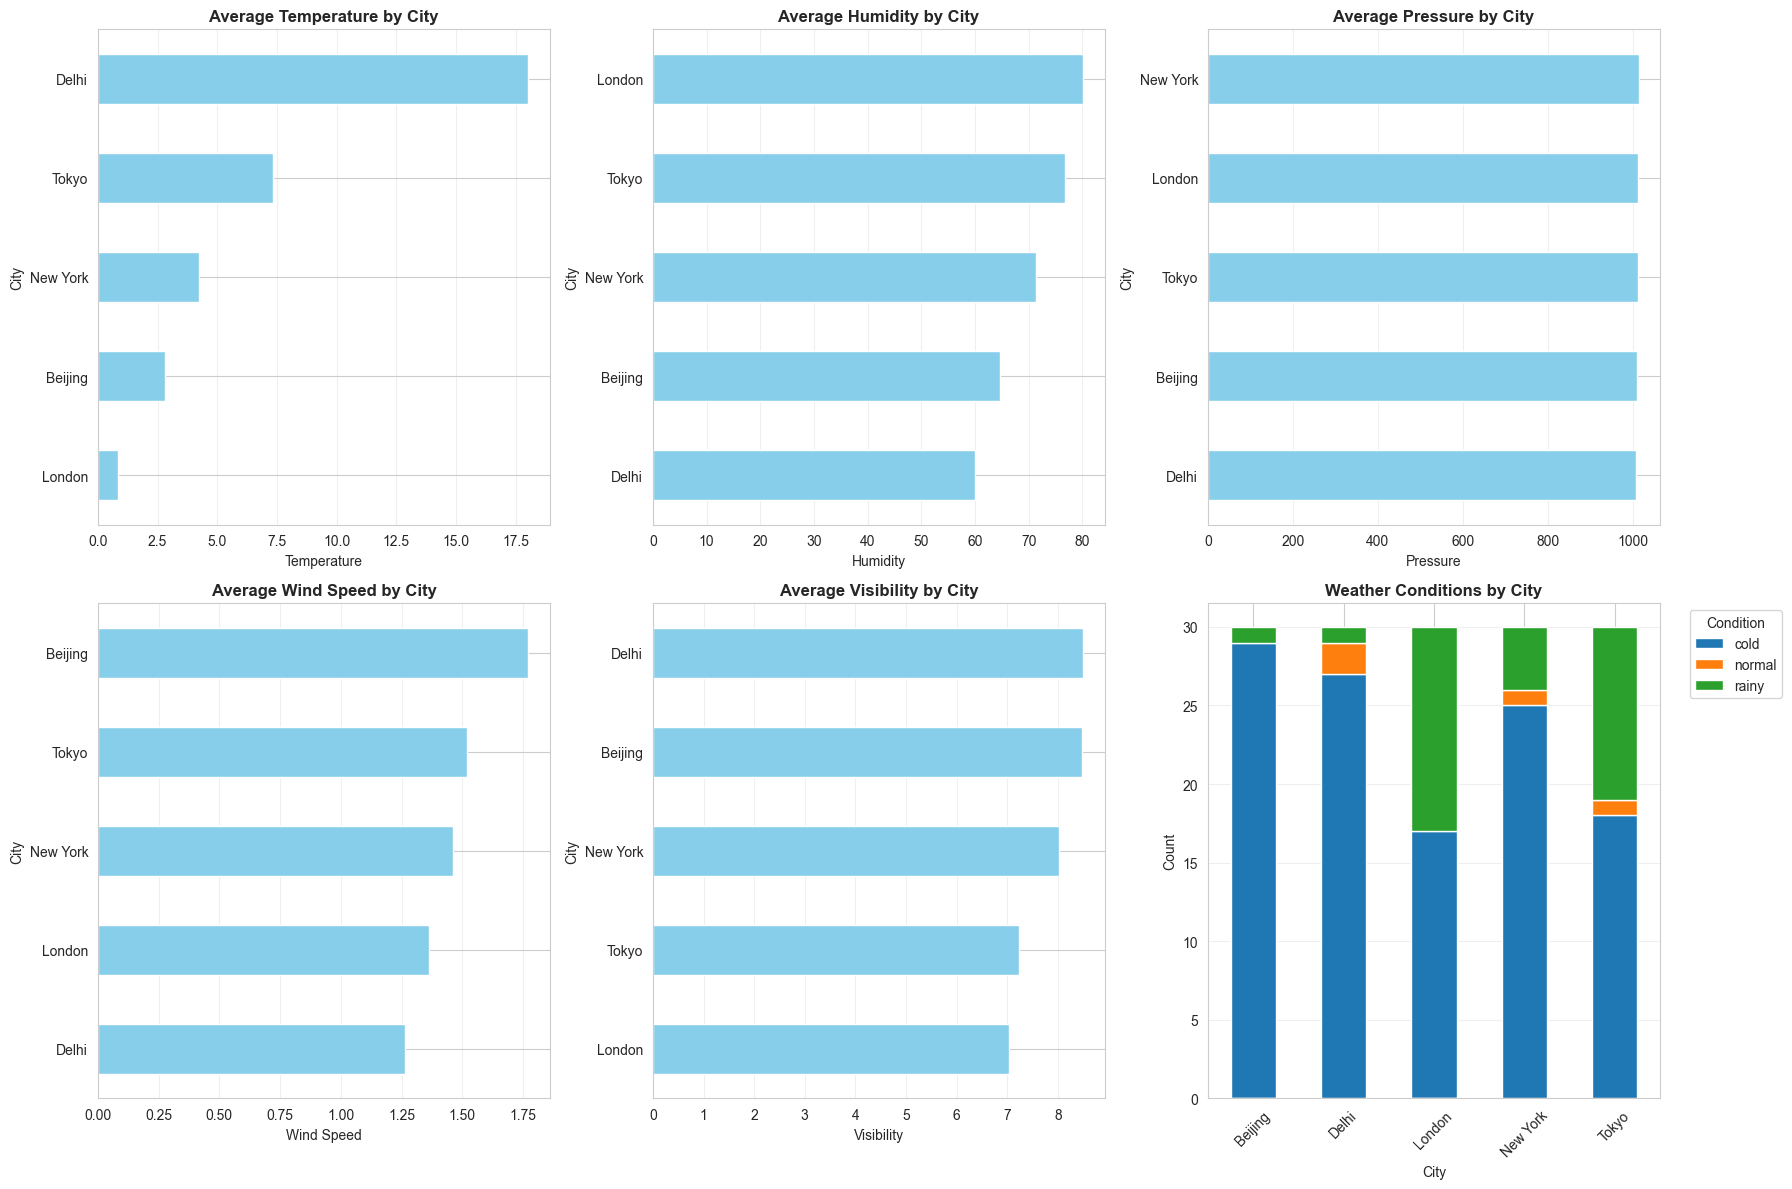

In [ ]:
# Weather metrics by city
weather_metrics = ['temperature', 'humidity', 'pressure', 'wind_speed', 'visibility']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, metric in enumerate(weather_metrics):
    ax = axes[idx]
    city_metric = df.groupby('city')[metric].mean().sort_values()
    city_metric.plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title(f'Average {metric.replace("_", " ").title()} by City', fontweight='bold')
    ax.set_xlabel(metric.replace("_", " ").title())
    ax.set_ylabel('City')
    ax.grid(axis='x', alpha=0.3)

# Weather conditions
ax = axes[-1]
condition_counts = df.groupby('city')['weather_condition'].value_counts().unstack(fill_value=0)
condition_counts.plot(kind='bar', ax=ax, stacked=True)
ax.set_title('Weather Conditions by City', fontweight='bold')
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


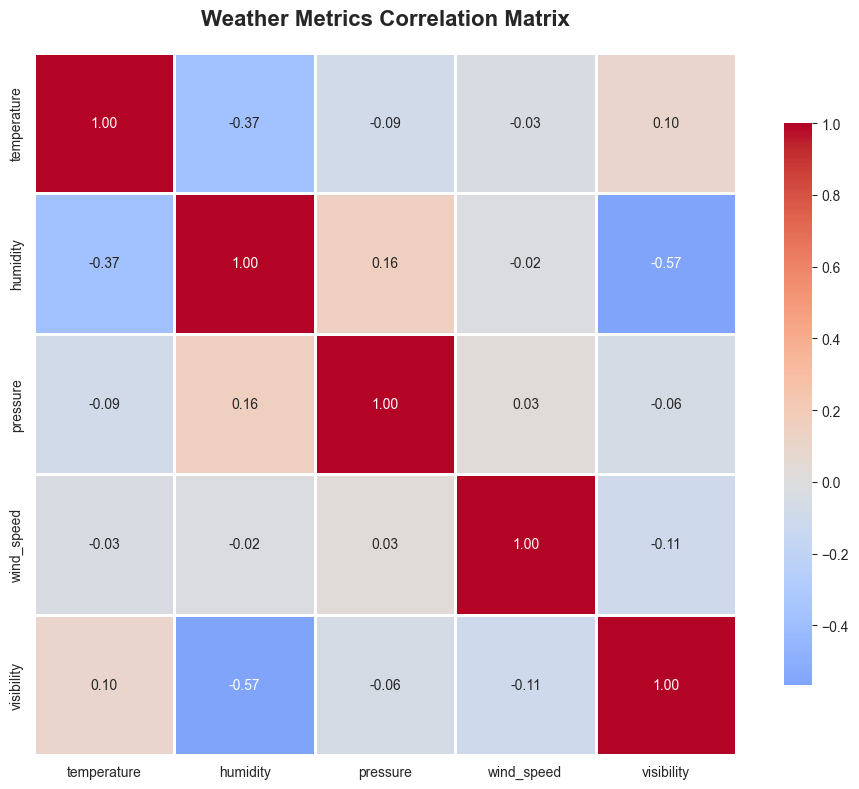

In [ ]:
# Correlation matrix
corr_matrix = df[weather_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Weather Metrics Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


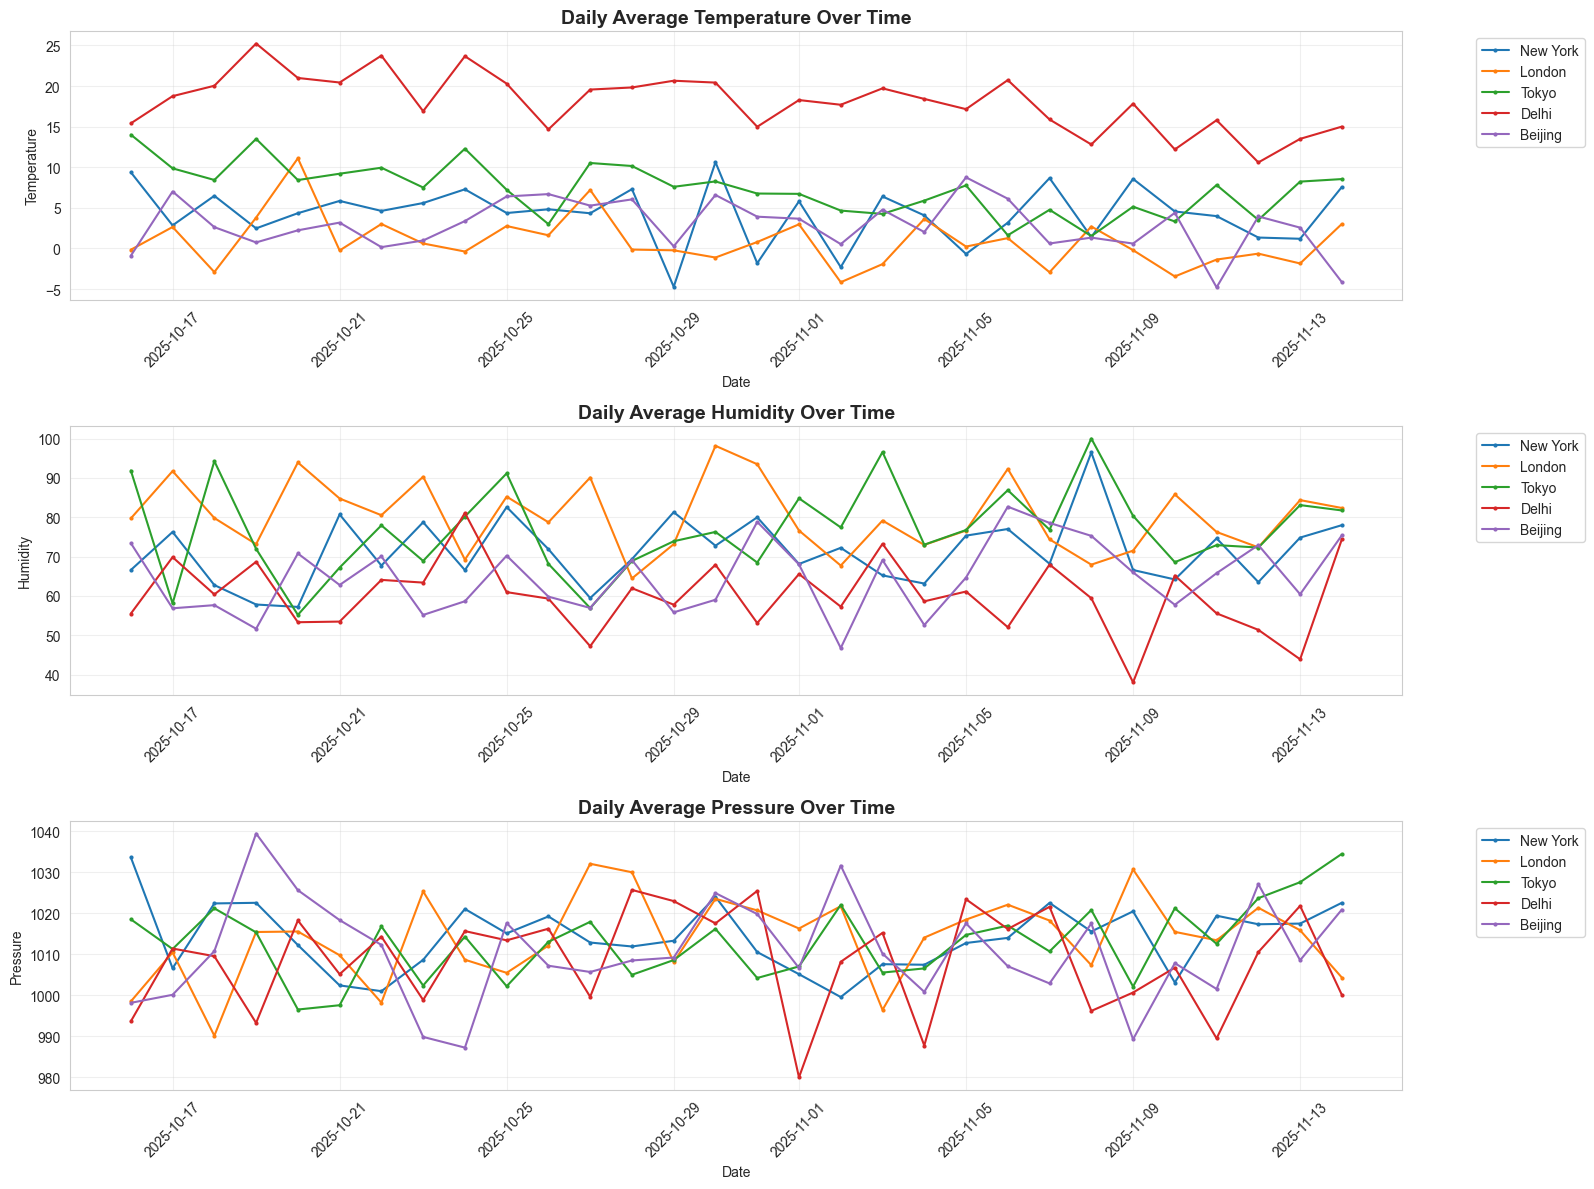

In [ ]:
# Time series - Temperature and Humidity
df['date'] = df['timestamp'].dt.date
daily_weather = df.groupby(['date', 'city']).agg({
    'temperature': 'mean',
    'humidity': 'mean',
    'pressure': 'mean'
}).reset_index()

fig, axes = plt.subplots(3, 1, figsize=(16, 12))
metrics_ts = ['temperature', 'humidity', 'pressure']

for idx, metric in enumerate(metrics_ts):
    ax = axes[idx]
    for city in df['city'].unique():
        city_data = daily_weather[daily_weather['city'] == city]
        ax.plot(city_data['date'], city_data[metric], label=city, marker='o', markersize=2)
    ax.set_title(f'Daily Average {metric.replace("_", " ").title()} Over Time', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
    ax.grid(alpha=0.3)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()
